In [1]:
import numpy as np
from numpy import pi
from scipy.special import factorial
from scipy.special import sph_harm
from scipy.optimize import fmin

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#%matplotlib qt5

plt.close('all')



Text(0.5, 0, '$r/a_B$')

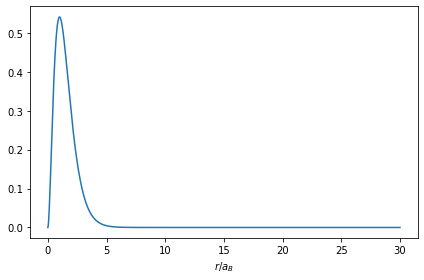

In [5]:
def R_nl(n,l,r,Z,aB):
    alph = n*aB/2/Z
    rho = r/alph
    k = 2*l+1
    M = n-l-1
    
    Legm2 = np.ones(rho.shape)
    Legm1 = 1+k-rho
    for i in range(2,M+1):
        Leg = (2*i-1+k-rho)/i*Legm1 - (i-1+k)/i*Legm2
        Legm2 = Legm1
        Legm1 = Leg
    if M == 0:
        Leg = np.ones(rho.shape)
    if M == 1:
        Leg = 1+k-rho
            
    Norm = np.sqrt((2*Z/(n*aB))**3*factorial(n-l-1)/2/n/factorial(n+l))
    R = Norm*np.exp(-rho/2)*rho**l*Leg
    
    return R

def E_n(n, Z):
    return -13.6 * Z/(n**2)

def Y_lm(l,m,theta,phi):
    Y = sph_harm(m,l,phi,theta)
    return Y

def Psi_nlm(n,l,m,r,theta,phi,Z,aB):    
    Psi_ = Y_lm(l,m,theta,phi)*R_nl(n,l,r,Z,aB)
    return Psi_

def Psi_nlm_t_eigen(t, Psi, n, Z, h):
    return np.exp(-E_n(n,Z)*1j /h * t) * Psi

def Psi_nlm_t(t, Psi1, Psi2, n1, n2, Z, h):
    return 1/np.sqrt(2) * (Psi1 + np.exp((E_n(n1,Z)-E_n(n2,Z))*1j /h * t) * Psi2)

#%% Plotte Radialanteil
aB = 1
Z = 1
n = 1
l = 0

r = np.linspace(0,30,1000)
Yplot = r**2*R_nl(n,l,r,Z,aB)**2

plt.figure(1)
plt.clf()
plt.plot(r/aB,Yplot)
plt.xlabel('$r/a_B$')



In [3]:
#%% Plotte Kugelflächenfunktion kartesisch
l = 1
m = 0

Phi = np.linspace(0,2*pi,200)
Theta = np.linspace(0,pi,200)
Phi2D, Theta2D = np.meshgrid(Phi,Theta)

Ycomplex = Y_lm(l,m,Theta2D,Phi2D)
Phase2D = np.angle(Ycomplex)

AbsVal2D = np.abs(Ycomplex)**2
#AbsVal2D = np.real(Ycomplex)
 


Text(0.5, 0, 'z')

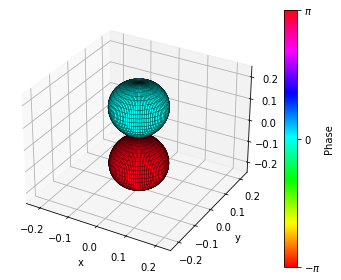

In [4]:
# Benutze Absolutbetrag als Radius für kartesisches Koordinatensystem
XYZWerte = np.array([np.sin(Theta2D)*np.cos(Phi2D),np.sin(Theta2D)*np.sin(Phi2D),np.cos(Theta2D)]) * AbsVal2D

colormap = cm.ScalarMappable( cmap=plt.get_cmap("hsv"))
colormap.set_clim(-pi, pi)
colormap.set_array(XYZWerte)


f = plt.figure(2)
plt.clf()
ax = f.gca(projection='3d')
surf = ax.plot_surface(XYZWerte[0],XYZWerte[1],XYZWerte[2],
                    facecolors=colormap.to_rgba(Phase2D),
                    rstride=4, cstride=2, linewidth=.25, shade=False)
surf.set_edgecolors('black')
ax.set_xlim(-np.amax(XYZWerte), np.amax(XYZWerte))
ax.set_ylim(-np.amax(XYZWerte), np.amax(XYZWerte))
ax.set_zlim(-np.amax(XYZWerte), np.amax(XYZWerte))
cbar = plt.colorbar(colormap,ticks= [-pi,0,pi], label='Phase')
cbar.ax.set_yticklabels(['$-\pi$', '$0$', '$\pi$'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')



[[0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]
 [0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]
 [0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]
 ...
 [0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]
 [0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]
 [0.         0.06346652 0.12693304 ... 6.15625227 6.21971879 6.28318531]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.03173326 0.03173326 0.03173326 ... 0.03173326 0.03173326 0.03173326]
 [0.06346652 0.06346652 0.06346652 ... 0.06346652 0.06346652 0.06346652]
 ...
 [3.07812614 3.07812614 3.07812614 ... 3.07812614 3.07812614 3.07812614]
 [3.10985939 3.10985939 3.10985939 ... 3.10985939 3.10985939 3.10985939]
 [3.14159265 3.14159265 3.14159265 ... 3.14159265 3.14159265 3.14159265]]


Text(0.5, 0, 'z')

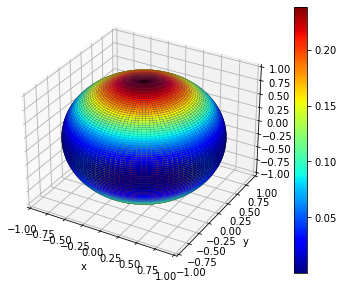

In [5]:
#%% Plotte Kugelflächenfunktion Dichte auf Einheitskugel
l = 1
m = 0

Phi = np.linspace(0,2*pi,100)
Theta = np.linspace(0,pi,100)
Phi2D, Theta2D = np.meshgrid(Phi,Theta)
print(Phi2D)
print(Theta2D)

Ycomplex = Y_lm(l,m,Theta2D,Phi2D)
Phase2D = np.angle(Ycomplex)

DensityVal = np.abs(Ycomplex)**2
#DensityVal = np.real(Ycomplex);
 
XYZWerte = np.array([np.sin(Theta2D)*np.cos(Phi2D),np.sin(Theta2D)*np.sin(Phi2D),np.cos(Theta2D)])

colormap = cm.ScalarMappable( cmap=plt.get_cmap("jet"))
colormap.set_clim(DensityVal.min(),DensityVal.max())
colormap.set_array(DensityVal)


f = plt.figure(3)
plt.clf()
ax = f.gca(projection='3d')
surf = ax.plot_surface(XYZWerte[0],XYZWerte[1],XYZWerte[2],
                    facecolors = colormap.to_rgba(DensityVal),
                    rstride=1, cstride=1, linewidth=.05, shade=False)
surf.set_edgecolors('black')
ax.set_xlim(-1,1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1,1)

cbar = plt.colorbar(colormap)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')




<ipython-input-12-051bd1fb1a67>:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xvec, zvec, DensPlot, cmap='RdBu_r', vmin=-np.max(DensPlot)/20, vmax=np.max(DensPlot)/20)


(-10.0, 10.0)

<Figure size 432x288 with 0 Axes>

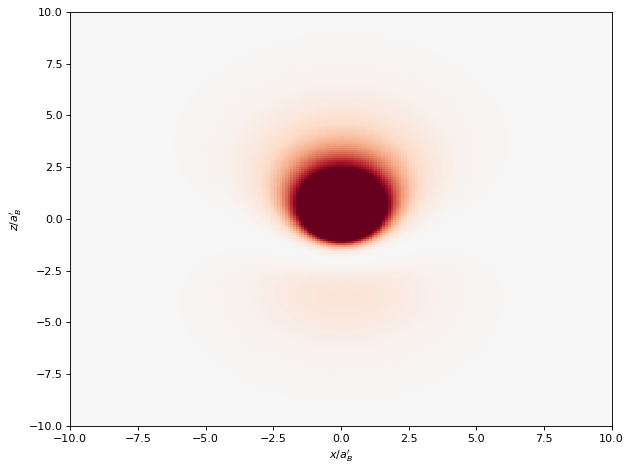

In [12]:
    
#%% Plotte Schnitt der gesamten Eigenfunktion
Z = 1
aB = 1
n = 2
l = 1
m = 0

n1 = 1
n2 = 2
l1 = 0
l2 = 1

xvec = aB*np.linspace(-200,200,4000)
zvec = aB*np.linspace(-200,200,4000)
x, z = np.meshgrid(xvec, zvec)
r = np.sqrt(x**2 + z**2)
theta = np.arccos(z/r)
phi = 0

plt.figure(4)
plt.clf()

Psi = Psi_nlm(n,l,m,r,theta,phi,Z,aB)
Psi_first = Psi_nlm(n1,l1,m,r,theta,phi,Z,aB)
Psi_second = Psi_nlm(n2,l2,m,r,theta,phi,Z,aB)
Psi_res = 1/(np.sqrt(2)) *(Psi_first + Psi_second)
DensPlot = abs(Psi_res)**2
    
plt.figure(figsize=(8, 6), dpi=80)    
plt.pcolormesh(xvec, zvec, DensPlot, cmap='RdBu_r', vmin=-np.max(DensPlot)/20, vmax=np.max(DensPlot)/20)
    # set the limits of the plot to the limits of the data
plt.axis([xvec.min(), xvec.max(), zvec.min(), zvec.max()])
plt.xlabel('$x/a_B\'$')
plt.ylabel('$z/a_B\'$')
plt.ylim(-10, 10)
plt.xlim(-10,10)

#plt.savefig('MeinName.png', format='png')

<ipython-input-7-fa0392eb9492>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xvec, zvec, DensPlot, cmap='RdBu_r', vmin=-np.max(DensPlot)/20, vmax=np.max(DensPlot)/20)


(-10.0, 10.0)

<Figure size 432x288 with 0 Axes>

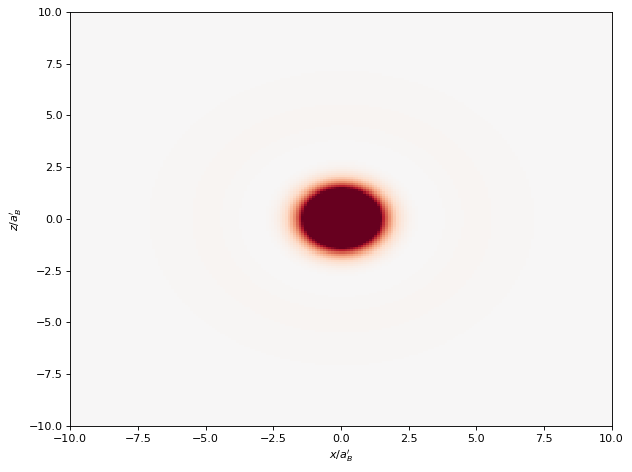

In [7]:
#%% Plotte Schnitt der gesamten Eigenfunktion - mit Zeitentwicklung
Z = 1
aB = 1
n = 2
l = 1
m = 0
h = 1

n1 = 1
n2 = 2
l1 = 0
l2 = 0

xvec = aB*np.linspace(-200,200,4000)
zvec = aB*np.linspace(-200,200,4000)
x, z = np.meshgrid(xvec, zvec)
r = np.sqrt(x**2 + z**2)
theta = np.arccos(z/r)
phi = 0

plt.figure(6)
plt.clf()

t = np.linspace(0, 10, 4000)

Psi = Psi_nlm(n,l,m,r,theta,phi,Z,aB)
#Psi_t_eigen = Psi_nlm_t_eigen(10, Psi, n, Z, h)
Psi_1 = Psi_nlm(n1,l1,m,r,theta,phi,Z,aB)
Psi_2 = Psi_nlm(n2,l2,m,r,theta,phi,Z,aB)
Psi_t = Psi_nlm_t(0, Psi_1, Psi_2, n1, n2, Z, h)

DensPlot = abs(Psi_t)**2
    
plt.figure(figsize=(8, 6), dpi=80)    
plt.pcolormesh(xvec, zvec, DensPlot, cmap='RdBu_r', vmin=-np.max(DensPlot)/20, vmax=np.max(DensPlot)/20)
    # set the limits of the plot to the limits of the data
plt.axis([xvec.min(), xvec.max(), zvec.min(), zvec.max()])
plt.xlabel('$x/a_B\'$')
plt.ylabel('$z/a_B\'$')
plt.ylim(-10, 10)
plt.xlim(-10,10)

#plt.savefig('MeinName.png', format='png')

<ipython-input-20-a534e46e5421>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xvec, zvec, DensPlot, cmap='RdBu_r', vmin=-np.max(DensPlot), vmax=np.max(DensPlot))
<ipython-input-20-a534e46e5421>:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xvec, yvec, DensPlot, cmap='RdBu_r', vmin=-np.max(DensPlot), vmax=np.max(DensPlot))


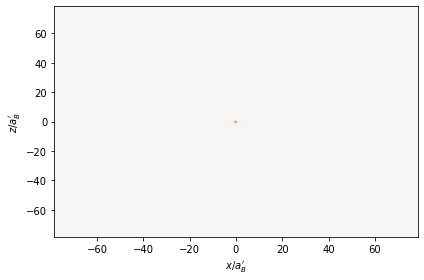

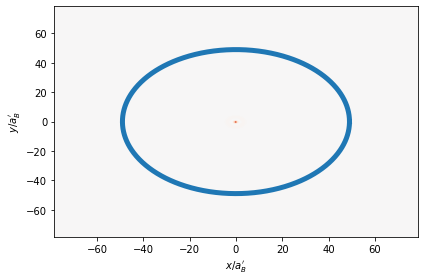

In [20]:
#%% Plotte zwei Schnitte der gesamten Eigenfunktion, Vergleich mit Bohrscher Bahn
Z = 1
aB = 1
n = 7
l = 0
m = 0
rBohr = n**2*aB/Z

xvec = aB*np.linspace(-1.6*rBohr,1.6*rBohr,1000)
yvec = aB*np.linspace(-1.6*rBohr,1.6*rBohr,1000)
zvec = aB*np.linspace(-1.6*rBohr,1.6*rBohr,1000)

x, z = np.meshgrid(xvec, zvec)
r = np.sqrt(x**2 + z**2)
theta = np.arccos(z/r)
phi = 0

plt.figure(5)
plt.clf()

Psi = Psi_nlm(n,l,m,r,theta,phi,Z,aB)
DensPlot = np.abs(Psi)**2
    
plt.pcolormesh(xvec, zvec, DensPlot, cmap='RdBu_r', vmin=-np.max(DensPlot), vmax=np.max(DensPlot))
plt.axis([xvec.min(), xvec.max(), zvec.min(), zvec.max()])
plt.xlabel('$x/a_B\'$')
plt.ylabel('$z/a_B\'$')

fname = "DensityCut_xz_n%d_l%d_m%d.png"%(n,l,m)
plt.savefig(fname, format='png')


x, y = np.meshgrid(xvec, yvec)
r = np.sqrt(x**2 + y**2)
theta = np.pi/2
phi = np.angle(x+1j*y)
Psi = Psi_nlm(n,l,m,r,theta,phi,Z,aB)


phivec = np.linspace(0,2*np.pi,1000)
xCirc = rBohr*np.cos(phivec)
yCirc = rBohr*np.sin(phivec)

plt.figure(6)
plt.clf()

DensPlot = np.abs(Psi)**2
    
plt.pcolormesh(xvec, yvec, DensPlot, cmap='RdBu_r', vmin=-np.max(DensPlot), vmax=np.max(DensPlot))
    # set the limits of the plot to the limits of the data
plt.plot(xCirc,yCirc,linewidth=5)
plt.axis([xvec.min(), xvec.max(), yvec.min(), yvec.max()])
plt.xlabel('$x/a_B\'$')
plt.ylabel('$y/a_B\'$')

fname = "DensityCut_xy_n%d_l%d_m%d.png"%(n,l,m)
plt.savefig(fname, format='png')

Text(0.5, 0, '$\\theta$')

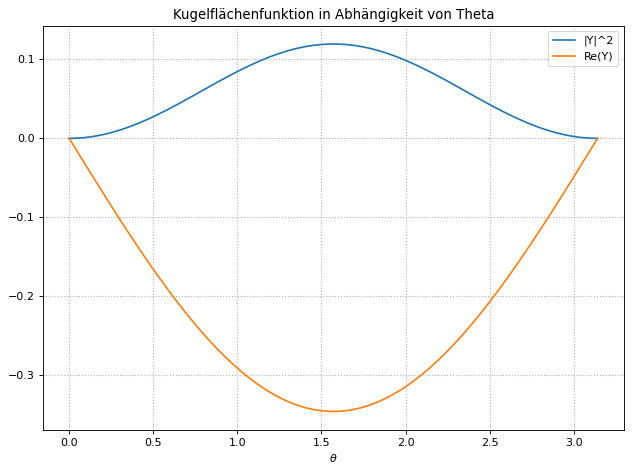

In [7]:
# Plotte Kugelflächenfunktionen einzeln in Abhängigkeit von Phi,Theta
l = 1
m = 1

Phi = np.linspace(0,2*pi,100)
Theta = np.linspace(0,pi,100)
#Phi2D, Theta2D = np.meshgrid(Phi,Theta)

#Ycomplex = Y_lm(l,m,Theta,Phi)
Ycomplex_phi = Y_lm(l,m,(np.ones(100)*np.pi/2),Phi)
Ycomplex_theta = Y_lm(l,m,Theta,np.zeros(100))

DensityVal_theta = np.abs(Ycomplex_theta)**2
RealVal_theta = np.real(Ycomplex_theta)
DensityVal_phi = np.abs(Ycomplex_phi)**2
RealVal_phi = np.real(Ycomplex_phi)

plt.figure(figsize=(8, 6), dpi=80)
plt.title("Kugelflächenfunktion in Abhängigkeit von Theta")
plt.plot(Theta, DensityVal_theta, label="|Y|^2")
plt.plot(Theta, RealVal_theta, label="Re(Y)")
plt.legend()
plt.grid(linestyle=":", linewidth=1)
plt.xlabel("$\\theta$")

Text(0.5, 0, '$\\varphi$')

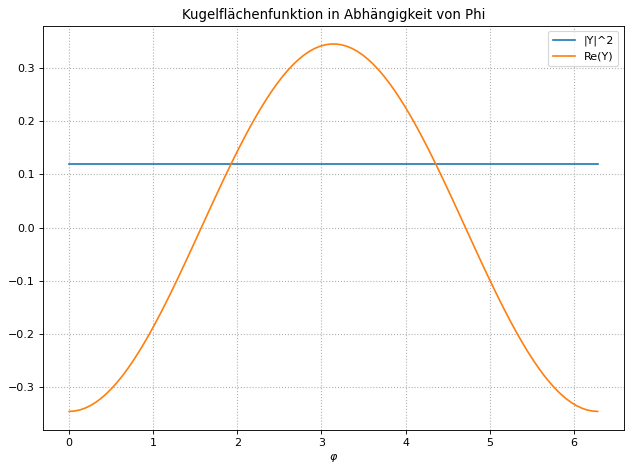

In [59]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title("Kugelflächenfunktion in Abhängigkeit von Phi")
plt.plot(Phi, DensityVal_phi, label="|Y|^2")
plt.plot(Phi, RealVal_phi, label="Re(Y)")
plt.legend()
plt.grid(linestyle=":", linewidth=1)
plt.xlabel("$\\varphi$")

In [74]:
# Aufgabe b)
F_x_theta = 1/np.sqrt(2) *(Y_lm(1,1,Theta,np.zeros(100)) - Y_lm(1,-1,Theta,np.zeros(100)))
F_x_phi = 1/np.sqrt(2) *(Y_lm(1,1,np.ones(100)*np.pi/2,Phi) - Y_lm(1,-1,np.ones(100)*np.pi/2,Phi))

Density_Fx_theta = np.abs(F_x_theta)**2
Density_Fx_phi = np.abs(F_x_phi)**2

F_y_theta = 1/np.sqrt(2) *(Y_lm(1,1,Theta,np.ones(100)*np.pi/2) + Y_lm(1,-1,Theta,np.ones(100)*np.pi/2))
F_y_phi = 1/np.sqrt(2) *(Y_lm(1,1,np.ones(100)*np.pi/2,Phi) + Y_lm(1,-1,np.ones(100)*np.pi/2,Phi))

Density_Fy_theta = np.abs(F_y_theta)**2
Density_Fy_phi = np.abs(F_y_phi)**2

F_z_theta = Y_lm(1,0,Theta,np.zeros(100))
F_z_phi = Y_lm(1,0,np.zeros(100),Phi)

Density_Fz_theta = np.abs(F_z_theta)**2
Density_Fz_phi = np.abs(F_z_phi)**2


Text(0.5, 0, '$\\theta$')

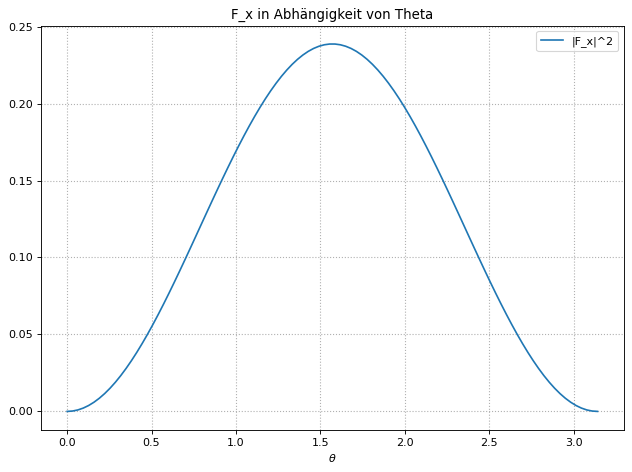

In [75]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title("F_x in Abhängigkeit von Theta")
plt.plot(Theta, Density_Fx_theta, label="|F_x|^2")
plt.legend()
plt.grid(linestyle=":", linewidth=1)
plt.xlabel("$\\theta$")

Text(0.5, 0, '$\\varphi$')

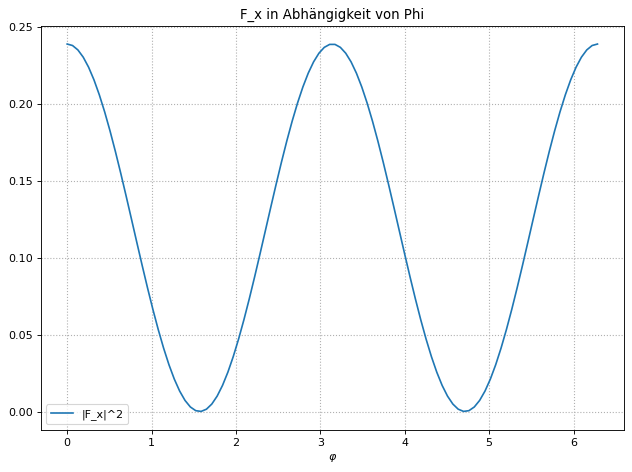

In [76]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title("F_x in Abhängigkeit von Phi")
plt.plot(Phi, Density_Fx_phi, label="|F_x|^2")
plt.legend()
plt.grid(linestyle=":", linewidth=1)
plt.xlabel("$\\varphi$")

Text(0.5, 0, '$\\theta$')

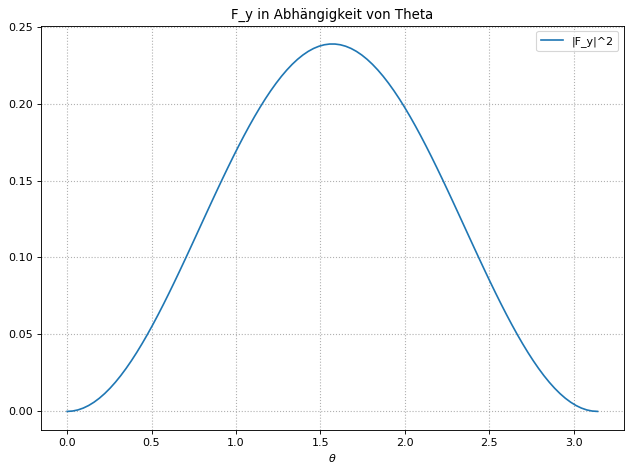

In [77]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title("F_y in Abhängigkeit von Theta")
plt.plot(Theta, Density_Fy_theta, label="|F_y|^2")
plt.legend()
plt.grid(linestyle=":", linewidth=1)
plt.xlabel("$\\theta$")

Text(0.5, 0, '$\\varphi$')

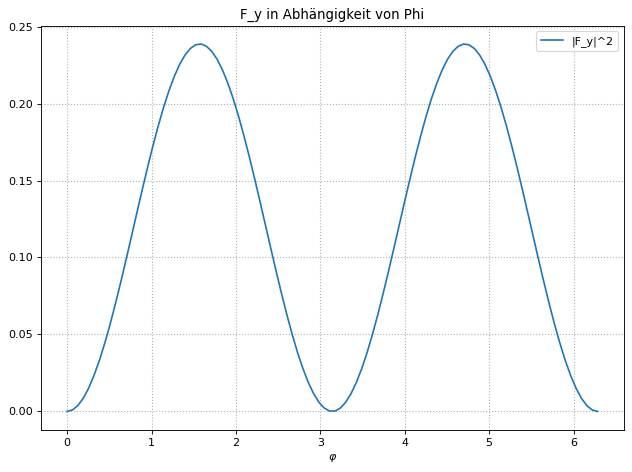

In [78]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title("F_y in Abhängigkeit von Phi")
plt.plot(Phi, Density_Fy_phi, label="|F_y|^2")
plt.legend()
plt.grid(linestyle=":", linewidth=1)
plt.xlabel("$\\varphi$")

Text(0.5, 0, '$\\theta$')

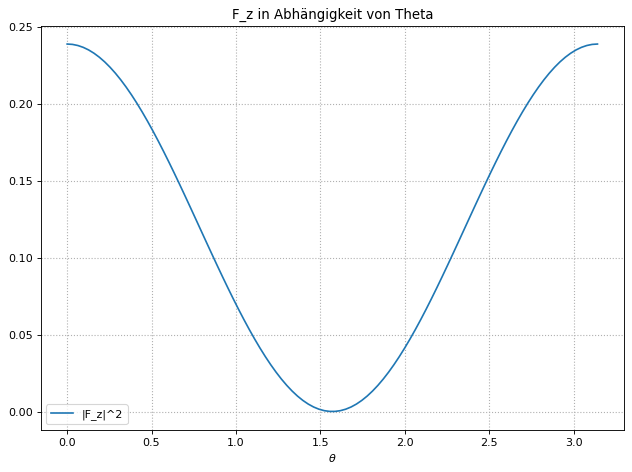

In [79]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title("F_z in Abhängigkeit von Theta")
plt.plot(Theta, Density_Fz_theta, label="|F_z|^2")
plt.legend()
plt.grid(linestyle=":", linewidth=1)
plt.xlabel("$\\theta$")

Text(0.5, 0, '$\\varphi$')

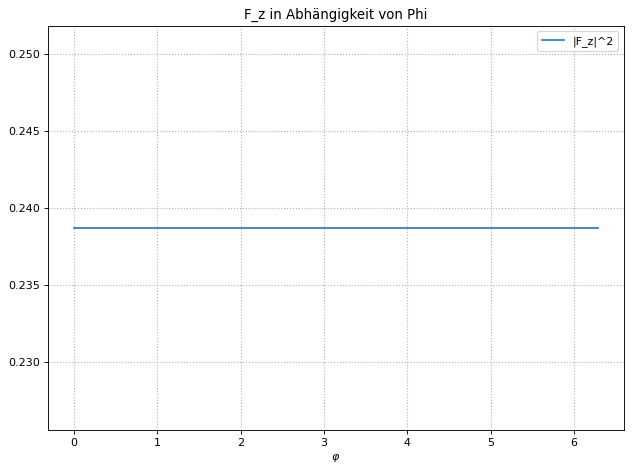

In [80]:
plt.figure(figsize=(8, 6), dpi=80)
plt.title("F_z in Abhängigkeit von Phi")
plt.plot(Phi, Density_Fz_phi, label="|F_z|^2")
plt.legend()
plt.grid(linestyle=":", linewidth=1)
plt.xlabel("$\\varphi$")

In [5]:
#%% Plotte Radialanteil
aB = 1
Z = 1
n = 4
l = 3

r = np.linspace(0,30,1000)
Yplot = r**2*R_nl(n,l,r,Z,aB)**2
Yplot_nonabs = R_nl(n,l,r,Z,aB)

plt.figure(figsize=(8, 6), dpi=80)
plt.title("Radialanteile")
plt.plot(r/aB,Yplot)
plt.xlabel('$r/a_B$')

maxima = np.array([1, 4, 9, 16])